# 활성화 함수
## Relu
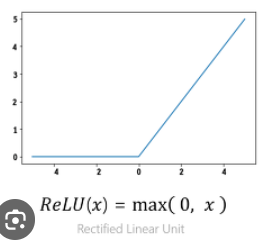


In [29]:
# 이미지 처리(Computer Vision) 를 위한 사전학습된(Pretrained) 모델 아키텍처 제공
from torchvision import models

In [30]:
dir(models) #모델 종류 확인

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [31]:
alexnet = models.AlexNet() #(features) -> layers, (classifier) -> 분류기

In [32]:
# resnet-101
    # 스킵커넥션(Sklip Connection, Residucal Block): 잔차(Residual)만 학습하게 하여 깊은 네트워크에서도 기울기 소실 없이 안정적으로 학습 -> 더 깊은 층까지 학습 가능
    # y=F(x) -> y=F(x)+x
resnet101 = models.resnet101(pretrained=False)
resnet101

c:\python_src\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\python_src\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [33]:
from PIL import Image

# img = Image.open('path')

##### `model.train()` _vs._ `model.eval()`
| 항목          | `model.train()`    | `model.eval()`    |
| ----------- | ------------------ | ----------------- |
| Dropout     | 무작위 뉴런 Drop        | Drop 비활성화         |
| BatchNorm   | 배치별 통계 사용          | 학습된 통계 사용         |
| 가중치 업데이트    | O (가능)             | X (고정)            |
| 목적          | 학습                 | 검증/테스트            |
| 일반적으로 함께 사용 | `optimizer.step()` | `torch.no_grad()` |

< `model.eval()` > <br>
모델을 평가(Evaluation) 모드로 전환하는 메서드 (딥러닝은 학습과 평가 중일 때 동작 방식이 다르기 때문)
- 모델 내의 배치 정규화 층, dropout층이 평가모드로 작동
- BatchNorm: 학습에는 현재 배치의 평균과 분산사용 평가모드가 되면, 학습과정 전체에서 누적된 평균/분산
- Dropout: 학습 시에는 랜덤하게 뉴런을 끄지만, 평가모드로 전환되면 모든 뉴런을 사용
- 예측: `alexnet(X_test)`

In [34]:
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

# 합성곱 신경망 CNN
- Convolutional Neural Network
- 사진의 특징(Feature) 을 자동으로 찾아내는 모델
- Convolution -> Activation Function -> Pooling(Max/Average)

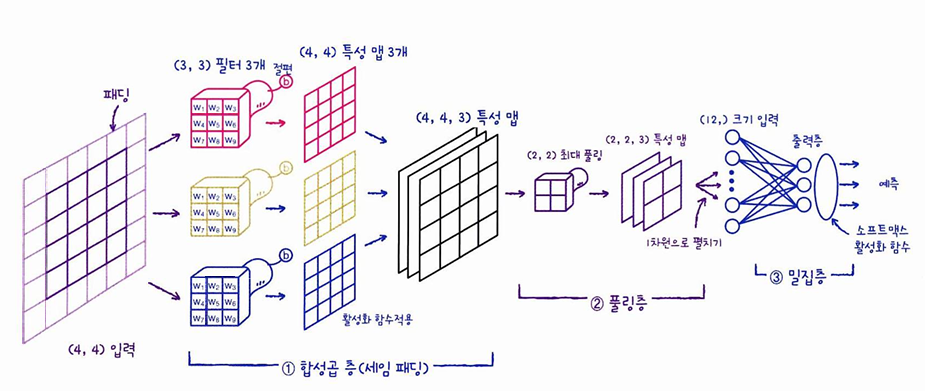

padding
- same padding: 입력과 특성 맵의 크기를 동일하게 만들기 위해 입력 주위에 0으로 패딩 하는 것
- valid padding: (기본값) 순수 입력 배열에만 합성곱하여 특성맵을 만드는 경우

### 합성곱 연산
- 이미지의 특징 추출
- 28x28x3 너비x높이x깊이 : 3차원 텐서
- 커널의 크기: 일반적으로 (3x3) or (5x5) 많이 사용
- ex. 이미지(5x5), 커널(3x3)

In [35]:
# 신경망을 구성하는 라이브러리
import torch
import torch.nn as nn

In [ ]:
# Pytorch는 채널 정보가 앞에 있다. tensorflow는 뒤에 있음.
# 배치크기*채널크기*높이*너비
# Batch: 한 번에 처리할 이미지 개수 -> 1:이미지 한 장만 처리 (여기선 상관ㄴㄴ)

inputs = torch.Tensor(1,1,28,28) #'28x28' 크기를 갖는 '한 개'의 '흑백' 이미지 => 1*28*28
inputs.size() #텐서의 크기

torch.Size([1, 1, 28, 28])

In [ ]:
# 1. 합성곱층 세임 패딩
# 합성곱층과 풀링 선언
conv1 = nn.Conv2d(1,32,3,padding=1) #특성맵 출력/ kernel_size=3 -> (3,3)/ stride=1 -> 기본값/ padding=1 -> (1,1) => 32*28*28
print(conv1)

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [38]:
# 2번째 합성곱 층
conv2 = nn.Conv2d(32,64,3,padding=1)
print(conv2)

Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [39]:
pool = nn.MaxPool2d(2)
print(pool)

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


In [40]:
# 데이터 통과하기
out = conv1(inputs)
out.size()

torch.Size([1, 32, 28, 28])

In [ ]:
# 2. 풀링층
out = pool(out)
print(out.size())

torch.Size([1, 32, 14, 14])


In [42]:
out = conv2(out)
print(out.size())

torch.Size([1, 64, 14, 14])


In [43]:
out = pool(out)
print(out.size())

torch.Size([1, 64, 7, 7])


In [ ]:
# 3. 밀집층
# '배치크기'는 유지한 채, 나머지 차원('채널','높이','너비')을 모두 곱해 1차원으로 펼치기
# 이미지 한 장당 3136개의 특징(feature) 이 존재
out = out.view(out.size(0), -1)
print(out.size())

torch.Size([1, 3136])


In [ ]:
# 분류기(Classifier, Dense layer?)
# 3136 -> 입력 노드 수 (in_features): 이전 계층에서 펼친(Flatten) 특징 개수
# 10 -> 출력 노드 수 (out_features): 예측할 클래스 개수 (ex. 0~9 숫자 10개)
fc = nn.Linear(3136,10)
out = fc(out)
print(out.size())

torch.Size([1, 10])


##### 적용하기

In [48]:
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms

`transfroms.Totensor()`
- PIL 이미지(예: 28×28 흑백 이미지)를 → 텐서형 데이터로 변환
- 값의 범위를 0~255 → 0~1 사이로 자동 스케일링
- 형태: (H, W, C)  →  (C, H, W) <br>

`transforms.Normalize((0.5,), (0.5,))`
- 픽셀값을 평균(mean)과 표준편차(std)로 스케일링

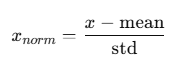

> mean = 0.5 <br>
> std = 0.5 <br>
> 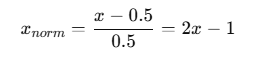


In [ ]:
# 이미지->텐서, 정규화(normalize)
transform = transforms.Compose([ transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,)) ])

# 데이터셋
train_dataset = torchvision.datasets.FashionMNIST(root='./data',train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data',train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

100%|██████████| 26.4M/26.4M [00:05<00:00, 4.57MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 107kB/s]
100%|██████████| 4.42M/4.42M [00:06<00:00, 693kB/s] 
100%|██████████| 5.15k/5.15k [00:00<00:00, 5.15MB/s]


In [ ]:
import numpy as np

for data in train_dataset:
    print(data[0].size())
    break

torch.Size([1, 28, 28])


In [53]:
for data in train_loader:
    print(data[0].size())
    break

torch.Size([64, 1, 28, 28])


In [57]:
# 모델을 상속받아서 하면 backward하기 편함
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1,32,3,padding=1)
        self.conv2 = nn.Conv2d(32,64,3,padding=1)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(64*7*7,128)
        self.fc2 = nn.Linear(128,10)
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))  #(64,1,28,28) -> (64,32,14,14)
        x = self.pool(F.relu(self.conv2(x)))  #(64,32,14,14) -> (64,64,7,7)
        x.view(64, -1)
        x = F.relu(self.fc1(x))
        out = self.fc2(x)
        return out
    
model = CNN()
model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss() #손실함수: 내부에 소프트맥스 + 로그 손실계산, 다중클래스 계산
optimizer = optim.Adam(model.parameters(), lr=0.001) #가중치 적절하게 조절


In [58]:
len(train_loader)

938

In [ ]:
# 훈련 루프
num_epochs = 5

for epoch in num_epochs:
    model.train() #모델을 train모드로 활성화(드랍아웃,배치노말,가중치 부여)
    running_loss = 0.05
    for inputs,labels in train_loader:
        nputs,labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad() #기울기 초기화
        outputs = model(inputs) #forward 호출 -> 예측
        loss = criterion(outputs,labels) #손실계산
        loss.backward() #역전파(기울기 계산)
        optimizer.step() # 파라미터(가중치) 업데이트 
        